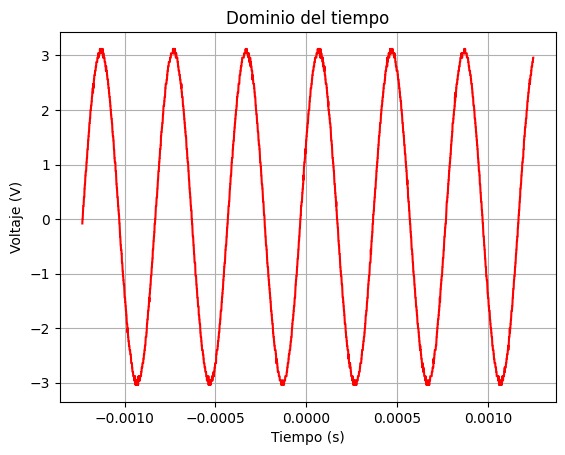

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo
archivo = '/content/seno1_tiempo.csv'

# Leer archivo desde fila 18, sin encabezado, con codificación Latin-1
datos = pd.read_csv(archivo, skiprows=17, header=None, encoding='latin1')

# Extraer columnas de interés
tiempo = datos.iloc[:, 3]
voltaje = datos.iloc[:, 4]

# Graficar
plt.plot(tiempo, voltaje, color='red')
plt.title('Dominio del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.show()

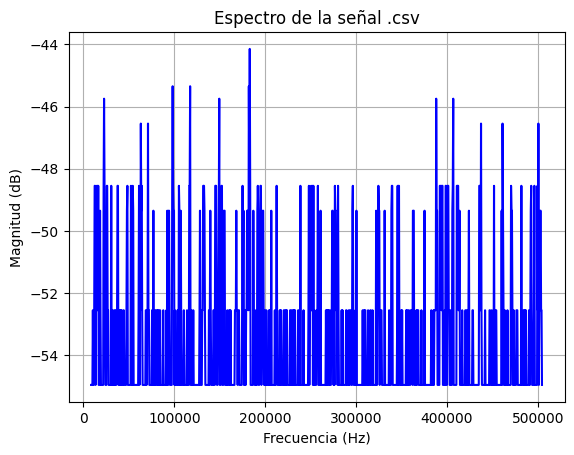

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo
archivo = '/content/seno1_fft.csv'

# Leer archivo desde fila 18, sin encabezado, con codificación Latin-1
datos = pd.read_csv(archivo, skiprows=17, header=None, encoding='latin1')

# Extraer columnas de interés
frecuencia = datos.iloc[:, 3]
magnitud = datos.iloc[:, 4]

# Graficar
plt.plot(frecuencia, magnitud, color='blue')
plt.title('Espectro de la señal .csv')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Cargar datos
datos = pd.read_csv('/content/pulso4.csv', skiprows=17, header=None, encoding='latin1')
t, v = datos.iloc[:, 3].values, datos.iloc[:, 4].values  # Tiempo (s), Voltaje (V)

# Calcular FFT
N = len(v)
dt = t[1] - t[0]
fs = 1/dt
freqs = fftfreq(N, dt)[:N//2]
fft_val = fft(v)[:N//2]
magnitud = np.abs(fft_val)/N  # Normalizada
magnitud[1:] *= 2  # Compensar frecuencias negativas (excepto DC)

# Graficar FFT
plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitud)
plt.title('Señal de Frecuencia (construida)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()

# Mostrar frecuencia dominante
idx = np.argmax(magnitud[1:]) + 1  # Ignorar DC
print(f"Frecuencia dominante: {freqs[idx]:.2f} Hz")
print(f"Amplitud: {magnitud[idx]:.4f} V")

Frecuencia dominante: 2416.43 Hz
Amplitud: 2.1340 V
